In [33]:
# import all required libraries
import numpy as np 
import string
from nltk.corpus import stopwords
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier 
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline

In [34]:
# importing the dataset
df = pd.read_csv(r"C:\Users\COMPAQ\Desktop\IBM\dataset\dialogs.txt", sep='\t')

In [35]:
df.head()

,"hi, how are you doing?",i'm fine. how about yourself?
0,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
1,i'm pretty good. thanks for asking.,no problem. so how have you been?
2,no problem. so how have you been?,i've been great. what about you?
3,i've been great. what about you?,i've been good. i'm in school right now.
4,i've been good. i'm in school right now.,what school do you go to?


In [36]:
#add column names
df.columns=['Questions','Answers']
df

,Questions,Answers
0,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
1,i'm pretty good. thanks for asking.,no problem. so how have you been?
2,no problem. so how have you been?,i've been great. what about you?
3,i've been great. what about you?,i've been good. i'm in school right now.
4,i've been good. i'm in school right now.,what school do you go to?
...,...,...
3719,that's a good question. maybe it's not old age.,are you right-handed?
3720,are you right-handed?,yes. all my life.
3721,yes. all my life.,you're wearing out your right hand. stop using...
3722,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


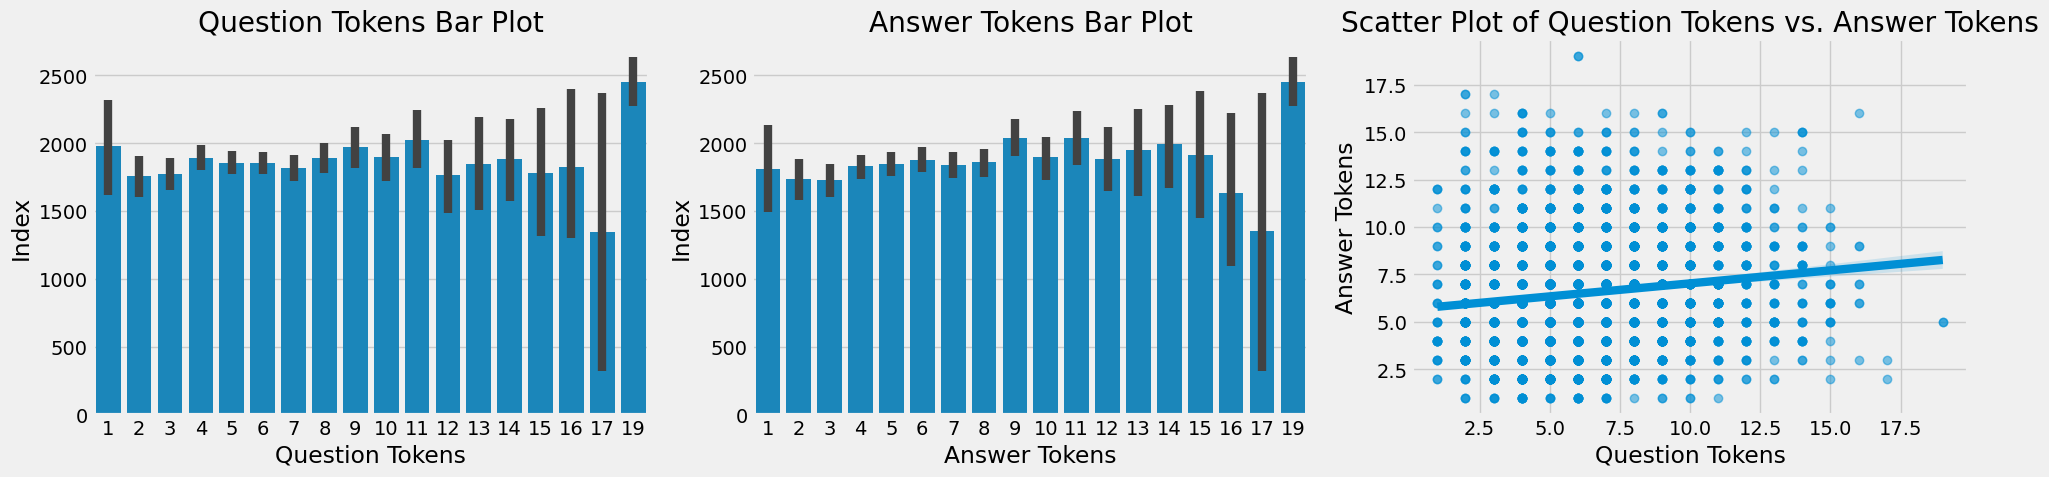

In [37]:
# Data Preprocessing
# Assuming you have a DataFrame 'df' with 'Questions' and 'Answers' columns

df['question tokens'] = df['Questions'].apply(lambda x: len(x.split()))
df['answer tokens'] = df['Answers'].apply(lambda x: len(x.split()))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
sns.set_palette('Set2')

# Create bar plots for question tokens and answer tokens
sns.barplot(x='question tokens', y=df.index, data=df, ax=ax[0])
ax[0].set_xlabel('Question Tokens')
ax[0].set_ylabel('Index')
ax[0].set_title('Question Tokens Bar Plot')

sns.barplot(x='answer tokens', y=df.index, data=df, ax=ax[1])
ax[1].set_xlabel('Answer Tokens')
ax[1].set_ylabel('Index')
ax[1].set_title('Answer Tokens Bar Plot')

# Create a scatter plot with a regression line for the relationship between question and answer tokens
sns.regplot(x='question tokens', y='answer tokens', data=df, ax=ax[2], scatter_kws={'alpha':0.5})
ax[2].set_xlabel('Question Tokens')
ax[2].set_ylabel('Answer Tokens')
ax[2].set_title('Scatter Plot of Question Tokens vs. Answer Tokens')

plt.tight_layout()
plt.show()




In [44]:
#Function for converting upper to lower case
def cleaner(x):
    return [a for a in (''.join([a for a in x if a not in string.punctuation])).lower().split()]

In [46]:
Pipe = Pipeline([
    ('bow',CountVectorizer(analyzer=cleaner)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MLPClassifier())
])

Pipe.fit(df['Questions'],df['Answers'])



C:\Users\COMPAQ\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x00000131B4E8A290>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MLPClassifier())])

In [57]:
Pipe.fit(df['Questions'],df['Answers'])

C:\Users\COMPAQ\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x00000131B4E8A290>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MLPClassifier())])

In [65]:
Pipe.predict(['like how clear the sky gets after it rains.'])[0]

'i feel the same way. it smells so good after it rains.'

In [60]:
Pipe.predict(['i want this trip to be perfect, i hope it stays warm.'])[0]

"this california weather is so uncertain, it's impossible to know what'll happen."

In [61]:
Pipe.predict(['it would not be good if it got cold this weekend.'])[0]

'i want this trip to be perfect, i hope it stays warm.'

In [62]:
Pipe.predict(['it would be nice if the weather would never change.'])[0]

'that would be great, then we could plan things sooner.'

In [63]:
Pipe.predict(['why is that?'])[0]

'because i love the snow.'

In [64]:
Pipe.predict(['What are you doing'])[0]

"i'm going to change the light bulb. it burnt out."